# Multi Graph Evolution

Graph evolution for multiple algorithms and datasets.

In [1]:
import os
import random
import time
import numpy as np
import networkx as nx

# local imports
from metrics import Recorder

In [2]:
# methods
WAGNER = "from methods import Wagner2022 as Method"
OTHERMETHOD = "from methods import OtherMethod as Method" # just an example for now

# datasets
CONGRESS = "congress", True
EMAIL_EU = "email_eu", True
WIKI_VOTE = "wiki_vote", True
FACEBOOK = "facebook", False
LASTFM = "lastfm", False
DEEZER = "deezer", False

# algorithms
NODE2VEC = "import node2vec as alg"
NODESIM = "import nodesim as alg"
FAIRWALK = "import fairwalk as alg"

# methods to test
methods = [ WAGNER ]

# datasets to test
datasets = [ CONGRESS, FACEBOOK ]

# algorithms to test
alg_imports = [ FAIRWALK, NODE2VEC ]


# Graph Evolution
ITERATIONS = 30
RESET_EVOLUTION = True

# Constants for I/O
INPUT_DIR = "../input"
OUTPUT_DIR = "../data"

In [3]:
def add_edges(nx_g, directed, edges):
    """
    Adds edges to given graph.
    """
    nx_g.add_edges_from(edges)
    if not directed:
        nx_g.add_edges_from([(v, u) for (u, v) in edges])


def remove_edges(nx_g, directed, edges):
    """
    Removes edges from given graph.
    """
    nx_g.remove_edges_from(edges)
    if not directed:
        nx_g.remove_edges_from([(v, u) for (u, v) in edges])


def get_minority_nodes(file_path):
    """
    Returns a list of minority nodes.
    """
    minorities = []
    with open(file_path, "r") as f:
        for line in f:
            node = int(line.strip())
            minorities.append(node)
    return minorities


def get_graph(file_path, directed):
    """
    Returns directed and undirected graphs as DiGraph.
    """
    init_g = nx.read_edgelist(file_path, create_using=nx.DiGraph(), nodetype=int)
    if not directed:
        init_g.add_edges_from([(v, u) for (u, v) in init_g.edges()])
    return init_g


def evolve_network(nx_g, directed, minorities, recorder, method):
    """
    Iteratively evolve the network by adding and removing edges.
    """
    # initialize algorithm
    nx_g = alg.initialize(nx_g, directed=directed, protected=minorities)
    
    # initial metrics
    recorder.record_metrics(nx_g)

    print("Iteration")
    print(f"0: {nx_g}")

    for i in range(1, ITERATIONS+1):

        to_predict = method.nodes_to_predict(nx_g)
        predictions = alg.predict(nx_g, directed=directed, nodes=to_predict)
        add_edges(nx_g, directed, predictions)

        removals = method.edges_to_remove(nx_g)
        remove_edges(nx_g, directed, removals)

        # compute metrics
        recorder.record_metrics(nx_g.copy())
  
        if i % 2 == 0:
            print(f"{i}: {nx_g}")
    
    return nx_g

Method: Wagner2022
Dataset: congress
Algorithm: fairwalk
Iteration
0: DiGraph with 475 nodes and 13289 edges
2: DiGraph with 475 nodes and 13289 edges
4: DiGraph with 475 nodes and 13289 edges
6: DiGraph with 475 nodes and 13289 edges
8: DiGraph with 475 nodes and 13289 edges
10: DiGraph with 475 nodes and 13289 edges
12: DiGraph with 475 nodes and 13289 edges
14: DiGraph with 475 nodes and 13289 edges
16: DiGraph with 475 nodes and 13289 edges
18: DiGraph with 475 nodes and 13289 edges
20: DiGraph with 475 nodes and 13289 edges
22: DiGraph with 475 nodes and 13289 edges
24: DiGraph with 475 nodes and 13289 edges
26: DiGraph with 475 nodes and 13289 edges
28: DiGraph with 475 nodes and 13289 edges
30: DiGraph with 475 nodes and 13289 edges
Time elapsed: 69.39232158660889


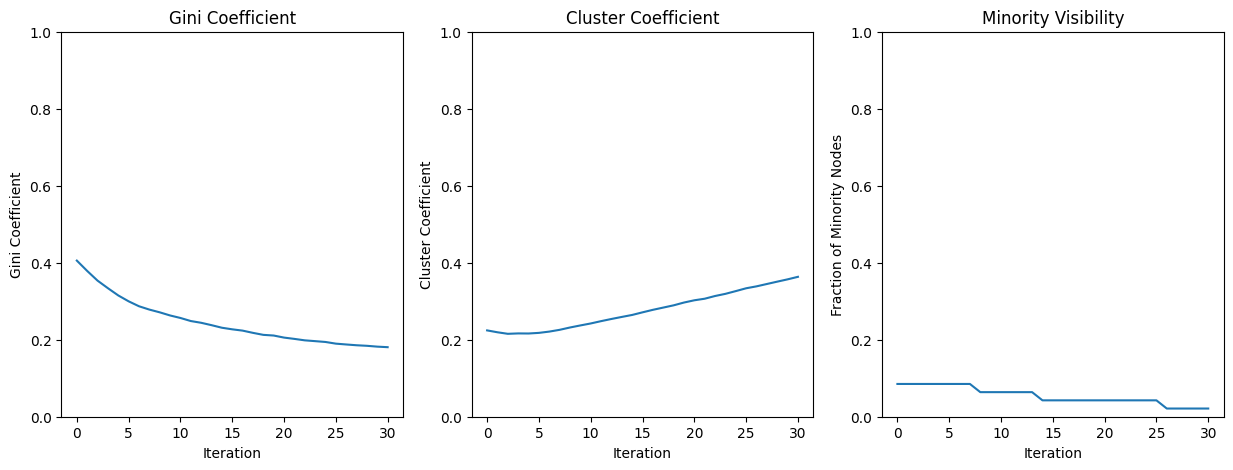

Method: Wagner2022
Dataset: congress
Algorithm: node2vec
Iteration
0: DiGraph with 475 nodes and 13289 edges
2: DiGraph with 475 nodes and 13289 edges
4: DiGraph with 475 nodes and 13289 edges
6: DiGraph with 475 nodes and 13289 edges
8: DiGraph with 475 nodes and 13289 edges
10: DiGraph with 475 nodes and 13289 edges
12: DiGraph with 475 nodes and 13289 edges
14: DiGraph with 475 nodes and 13289 edges
16: DiGraph with 475 nodes and 13289 edges
18: DiGraph with 475 nodes and 13289 edges
20: DiGraph with 475 nodes and 13289 edges
22: DiGraph with 475 nodes and 13289 edges
24: DiGraph with 475 nodes and 13289 edges
26: DiGraph with 475 nodes and 13289 edges
28: DiGraph with 475 nodes and 13289 edges
30: DiGraph with 475 nodes and 13289 edges
Time elapsed: 46.011993646621704


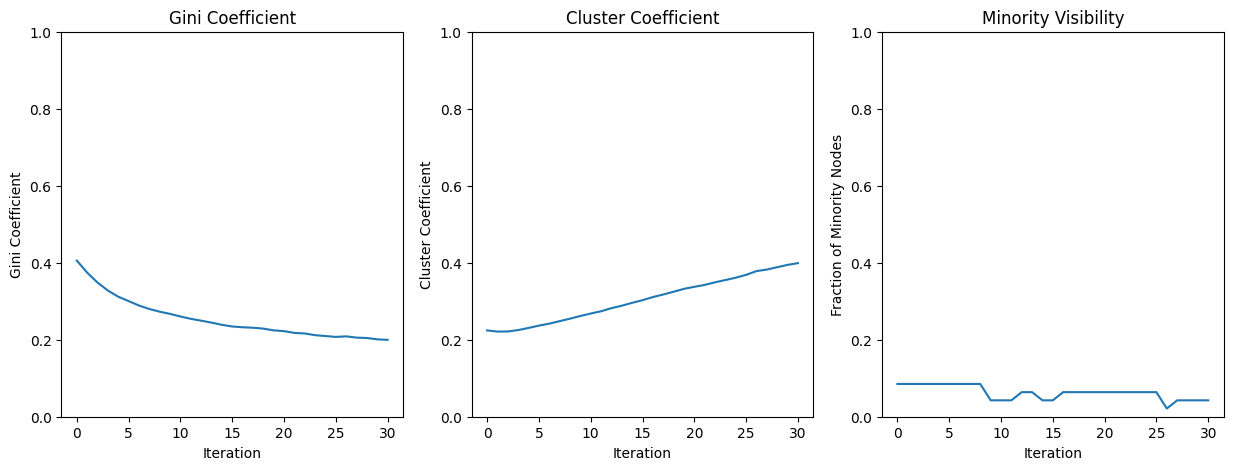

Method: Wagner2022
Dataset: facebook
Algorithm: fairwalk
Iteration
0: DiGraph with 4039 nodes and 176468 edges
2: DiGraph with 4039 nodes and 176476 edges
4: DiGraph with 4039 nodes and 176484 edges
6: DiGraph with 4039 nodes and 176498 edges
8: DiGraph with 4039 nodes and 176502 edges
10: DiGraph with 4039 nodes and 176504 edges
12: DiGraph with 4039 nodes and 176506 edges
14: DiGraph with 4039 nodes and 176506 edges
16: DiGraph with 4039 nodes and 176508 edges
18: DiGraph with 4039 nodes and 176508 edges
20: DiGraph with 4039 nodes and 176508 edges
22: DiGraph with 4039 nodes and 176508 edges
24: DiGraph with 4039 nodes and 176510 edges
26: DiGraph with 4039 nodes and 176510 edges
28: DiGraph with 4039 nodes and 176510 edges
30: DiGraph with 4039 nodes and 176512 edges
Time elapsed: 1153.0963926315308


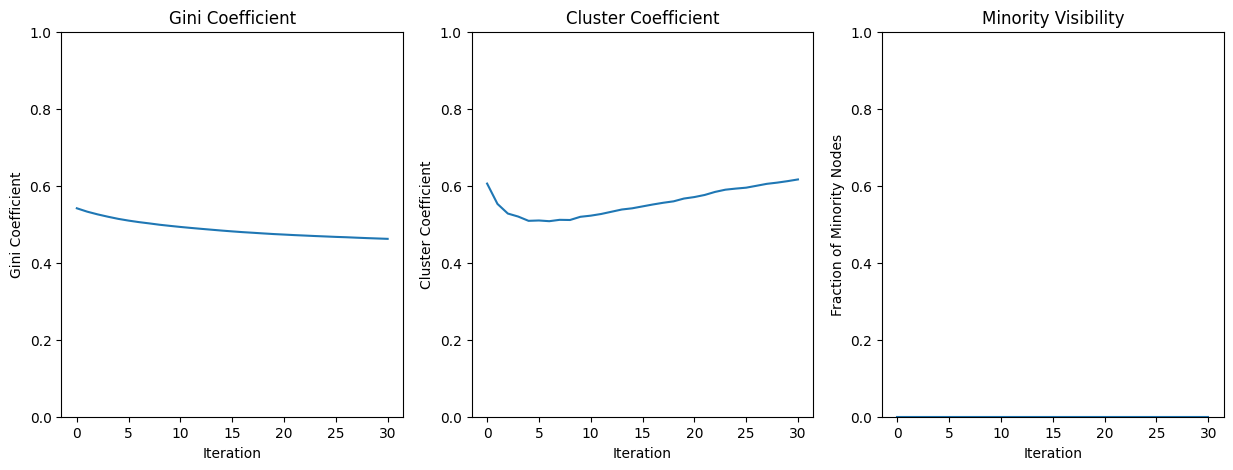

Method: Wagner2022
Dataset: facebook
Algorithm: node2vec
Iteration
0: DiGraph with 4039 nodes and 176468 edges
2: DiGraph with 4039 nodes and 176486 edges
4: DiGraph with 4039 nodes and 176494 edges
6: DiGraph with 4039 nodes and 176496 edges
8: DiGraph with 4039 nodes and 176496 edges
10: DiGraph with 4039 nodes and 176500 edges
12: DiGraph with 4039 nodes and 176504 edges
14: DiGraph with 4039 nodes and 176504 edges


In [4]:
# for each method to test
for method_import in methods:
    exec(method_import) # import the method

    # for each dataset to test
    for basename, directed in datasets:

        # for each algorithm to test
        for alg_import in alg_imports:
            exec(alg_import) # import the algorithm

            # file paths
            ouput_prefix = f"{basename}.{Method.name}.{alg.__name__}"
            minorities_path = os.path.join(INPUT_DIR, basename + ".minorities")
            edgelist_path = os.path.join(INPUT_DIR, basename + ".txt")
            evolved_edgelist_path = os.path.join(OUTPUT_DIR, ouput_prefix + ".txt")

            minorities = get_minority_nodes(minorities_path)

            # initialize recorder
            recorder = Recorder(directed=directed,
                                protected=minorities,
                                output_dir=OUTPUT_DIR,
                                output_prefix=ouput_prefix)
            
            if RESET_EVOLUTION:
                init_g = get_graph(edgelist_path, directed)
                recorder.clear_files()
            else:
                init_g = get_graph(evolved_edgelist_path, directed)
            
            # initialize method
            method = Method(init_g, directed=directed, protected=minorities)

            print(f"Method: {Method.__name__}")
            print(f"Dataset: {basename}")
            print(f"Algorithm: {alg.__name__}")

            # evolve the network
            start = time.time()
            final_g = evolve_network(init_g, directed, minorities, recorder, method)
            end = time.time()
            print(f"Time elapsed: {end - start}")

            # plot metrics
            recorder.plot_metrics()

            # write evolved graph to file
            if directed:
                nx.write_edgelist(final_g, evolved_edgelist_path, data=False)
            else:
                nx.write_edgelist(final_g.to_undirected(), evolved_edgelist_path, data=False)